# Assignment 3 Text Analysis
INST447 Spring 2021 - Farmer<br>
#### Name: Dillon Morley UID: 114735850



Resources
- https://docs.python.org/3/library/re.html
- https://www.dataquest.io/blog/regex-cheatsheet/
- http://www.pyregex.com/

In [424]:
# import modules
import re, os
import pandas as pd
import numpy as np
import datetime
import time
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

# Part A: Applied Regular Expressions

## Email Server Logs
This is a typical server log for an email server. Administrators often use regex to make sense of it.

Create a DataFrame with the date, time, ip address, email address, and the reason it was blocked

In [425]:
f = open('email_log.txt', 'r')
text = f.read()
#print(text)
f.close()

# use regular expressions to select key element
# create a data frame with this information
mlist = re.finditer('(?P<Date>\d{4}-\d{2}-\d{2}).*?(?P<Time>\d{2}:\d{2}:\d{2}).*?(?P<IP>\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}).*?\<(?P<Email>\w+@[\w\.]+)\>.*?(?P<Reason>\w{3}\s+\w{6,10}\s+\w+\s+\w+).*?',text)
#type(mlist)
#print(mlist)
myNewList = []
for m in mlist:
    myNewList.append({'Date':m['Date'],'Time':m['Time'],'IP':m['IP'],'Email':m['Email'],'Reason':m['Reason']})
    
# create a data frame with this information
email_df = pd.DataFrame(myNewList)
email_df

,Date,Time,IP,Email,Reason
0,2008-11-08,06:32:46,89.223.216.72,toshiter@donin.com,Not supporting null originator
1,2008-11-08,06:33:17,208.99.214.236,moneydiet2@mx22.ecreditchoices7.com,msg denied before queued
2,2008-11-08,06:34:53,84.58.57.150,sundered@ancientinc.com,msg denied before queued
3,2008-11-08,06:35:41,58.126.113.198,benny@surecom.com,Not supporting null originator
4,2008-11-08,06:37:31,87.103.146.91,dwweem@wee.com,msg denied before queued
5,2008-11-08,06:37:41,87.103.146.91,dwtrupsm@trups.com,msg denied before queued


## Single Raw Email
For e-discovery (the process of identifying computer-based evidence for legal cases), sometimes you need to get information out of raw email files. Or maybe you are trying to automate a process, like support tickets, through email. Regex is a powerful way to extract the data.

In [426]:
f = open('raw_email.txt', 'r')
text = f.read()
#print(text)
f.close()

In [427]:
# Get the email addresses of the lists this was sent to using regular expressions
list_emails = re.findall(r'To: ".*',text)
for line in list_emails:
    print(re.findall('<([\w.-]+@[\w.-]+)>',line))

['ethics@listserv.aoir.org', 'air-l@listserv.aoir.org']


In [428]:
# Get the name of the sender using regular expressions
sender = re.findall(r'From:.*',text)
for line in sender:
    print(re.findall('"(.*)"',line))

['Charles M. Ess']


In [429]:
# Get the email of the sender using regular expressions
for line in sender:
    print(re.findall('[\w.-]+@[\w.-]+',line))

['c.m.ess@media.uio.no']


In [430]:
# Find all the IP addresses using regular expressions
ip_address = re.findall('\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}',text)
ip_address

['10.107.97.16',
 '68.232.143.84',
 '018.04.06.23',
 '64.90.62.202',
 '64.90.62.202',
 '129.240.10.50',
 '129.240.10.40',
 '42.249.16.62',
 '62.16.249.42',
 '192.168.1.122',
 '62.16.249.42',
 '62.16.249.42',
 '192.168.1.122']

## Multiple Raw Emails
From: https://www.kaggle.com/rtatman/fraudulent-email-corpus
* See acknowledgements required if this data is to be used in formal papers (not this assignment)

**Context:**
Fraudulent e-mails contain criminally deceptive information, usually with the intent of convincing the recipient to give the sender a large amount of money. Perhaps the best known type of fraudulent e-mails is the Nigerian Letter or “419” Fraud.

**Content:**
This dataset is a collection of more than 2,500 "Nigerian" Fraud Letters, dating from 1998 to 2007.

These emails are in a single text file. Each e-mail has a header which includes the following information:

- Return-Path: address the email was sent from
- X-Sieve: the X-Sieve host (always cmu-sieve 2.0)
- Message-Id: a unique identifier for each message
- From: the message sender (sometimes blank)
- Reply-To: the email address to which replies will be sent
- To: the email address to which the e-mail was originally set (some are truncated for anonymity)
- Date: Date e-mail was sent
- Subject: Subject line of e-mail
- X-Mailer: The platform the e-mail was sent from
- MIME-Version: The Multipurpose Internet Mail Extension version
- Content-Type: type of content & character encoding
- Content-Transfer-Encoding: encoding in bits
- X-MIME-Autoconverted: the type of autoconversion done
- Status: r (read) and o (opened)

In [432]:
# I created a minimized version of the original file.
f = open('fraudulent_emails_minimized.txt', 'r', encoding="ISO-8859-1")
text = f.read()
#print(text)
f.close()

In [433]:
# Get the "Subject:" of the emails using regular expressions and put them in a dataframe
# remove any that do not contain any text
subjects = re.findall(r'Subject:(.*)',text)
subject_list = []

for line in subjects:
    if line != ' ':
        subject_list.append(line)

subject_df = pd.DataFrame(subject_list)
subject_df.columns=['Subjects']
subject_df.head(10)

,Subjects
0,URGENT BUSINESS ASSISTANCE AND PARTNERSHIP
1,URGENT ASSISTANCE /RELATIONSHIP (P)
2,GOOD DAY TO YOU
3,GOOD DAY TO YOU
4,I Need Your Assistance.
5,Partnership
6,Urgent Attention
7,URGENT BUSINESS PRPOSAL
8,THANK YOU
9,Urgent Assistance


In [434]:
# Write an aggregation to see the top 5 subject lines by count
top_5_subjects = subject_df.value_counts().head(5)
top_5_subjects

Subjects                 
 URGENT                      8
 CONFIDENTIAL/COOPERATION    7
 URGENT ASSISTANCE           7
 BUSINESS PROPOSAL           6
 URGENT BUSINESS PROPOSAL    6
dtype: int64

In [435]:
# Get the "From:" of the emails using regular expressions and put the emails in a dataframe
# remove any that do not contain any text
from_list = re.findall(r'From:.*<([\w.-]+@[\w.-]+)>',text)
from_list

from_df = pd.DataFrame(from_list)
from_df.columns=['From:']
from_df.head(10)

,From:
0,james_ngola2002@maktoob.com
1,bensul2004nng@spinfinder.com
2,obong_715@epatra.com
3,obong_715@epatra.com
4,m_abacha03@www.com
5,davidkuta@postmark.net
6,tunde_dosumu@lycos.com
7,william2244drallo@maktoob.com
8,abdul_817@rediffmail.com
9,barrister_td@lycos.com


In [436]:
# Write an aggregation to see the top 5 "From:" by count
top_5_from = from_df.value_counts().head(5)
top_5_from

From:                          
sameezx6@go.com                    5
victoriabucknor23@mail15.com       4
ejieego@netscape.net               4
mohammedabacha000@tiscali.co.uk    4
jdsouza1@hotvoice.com              4
dtype: int64

In [437]:
# Get the "Date:" of the emails using regular expressions and put them in a dataframe
# Remove any rows without a date
# Remove any that are before 1998 (you'll see some from 1980...obvious errors)
#date_list = re.findall('Date:.*(\w{3}, \d{1,2} \w{3} [0,1,9,8]{4})',text) 
#USING THE CODE ABOVE I CAN SEE THAT THE ONLY DATES FROM THE 90s THAT WE WANT TO COUNT ARE FROM 99.
dates = re.findall('Date:.*(\w{3}, \d{1,2} \w{3} [0,1,2,3,9]{4} \d{2}:\d{2}:\d{2})',text) #Exclude the number 8 so we don't get 1980 in our date section.
date_df = pd.DataFrame(dates)
date_df.columns=['Date/Time']
date_df[['Date','Time']] = date_df['Date/Time'].str.rsplit(' ',n=1, expand=True)
date_df['Date'] = pd.to_datetime(date_df['Date'])
date_df


,Date/Time,Date,Time
0,"Thu, 31 Oct 2002 02:38:20",2002-10-31,02:38:20
1,"Thu, 31 Oct 2002 05:10:00",2002-10-31,05:10:00
2,"Thu, 31 Oct 2002 22:17:55",2002-10-31,22:17:55
3,"Thu, 31 Oct 2002 22:44:20",2002-10-31,22:44:20
4,"Fri, 1 Nov 2002 01:45:04",2002-11-01,01:45:04
...,...,...,...
501,"Mon, 15 Dec 2003 05:52:47",2003-12-15,05:52:47
502,"Mon, 15 Dec 2003 18:05:45",2003-12-15,18:05:45
503,"Mon, 15 Dec 2003 19:02:24",2003-12-15,19:02:24
504,"Mon, 15 Dec 2003 19:03:05",2003-12-15,19:03:05


### Using our previous knowledge on Date Time, we can convert our dates from our emails into datetime to create our visualizations.

###### Days of the Week:
- Monday = 0
- Tuesday = 1
- Wednesday = 2
- Thursday = 3
- Friday = 4
- Saturday = 5
- Sunday = 6

In [438]:
# Create a graph by day of week when the email was sent
# Does there seem to be a difference in terms of the day of the week a fraudulent email was sent?
date_df['DayOfWeek'] = date_df['Date'].dt.weekday
dowDF = date_df[['DayOfWeek','Date']].groupby('DayOfWeek').agg('count').reset_index()
dowDF.columns = ['DayOfWeek','Num_of_emails']
dowDF

,DayOfWeek,Num_of_emails
0,0,92
1,1,83
2,2,68
3,3,88
4,4,73
5,5,62
6,6,40


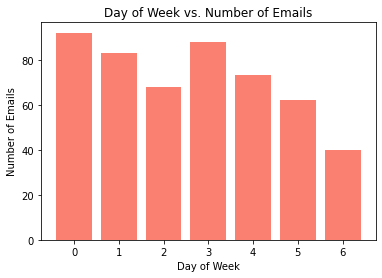

In [439]:
plt.bar(dowDF['DayOfWeek'],dowDF['Num_of_emails'],color='salmon')
plt.ylabel('Number of Emails');
plt.xlabel('Day of Week');
plt.title('Day of Week vs. Number of Emails');

#### Does there seem to be a difference in terms of the day of the week a fraudulent email was sent?
Looking at our day of the week dataframe and barchart, the majority of fraudulent emails are sent on a week day. The most emails were sent on Monday, and the least emails were sent on Sunday. However, looking at the general trend of the emails it was pretty consistent throughout and there were no significant differences between days.

In [442]:
# Create a graph by hour of day when the email was sent
# Does there seem to be a difference in terms of the hour of the day a fraudulent email was sent?
date_df['HourOfDay'] = date_df["Time"].apply(lambda x:datetime.datetime.strptime(x,"%H:%M:%S").hour)
hourDF = date_df[['HourOfDay','Date']].groupby('HourOfDay').agg('count').reset_index()
hourDF.columns = ['Hour','Num_of_emails']
hourDF

,Hour,Num_of_emails
0,0,20
1,1,24
2,2,23
3,3,19
4,4,19
5,5,20
6,6,20
7,7,23
8,8,29
9,9,13


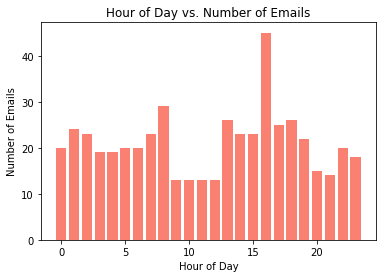

In [441]:
plt.bar(hourDF['Hour'],hourDF['Num_of_emails'],color='salmon');
plt.xticks(rotation = 0);
plt.ylabel('Number of Emails');
plt.xlabel('Hour of Day');
plt.title('Hour of Day vs. Number of Emails');

#### Does there seem to be a difference in terms of the hour of the day a fraudulent email was sent?
Looking at our hour dataframe as well as our barchart, you can see that there doesn't seem to be a difference in terms of the hour of the day a fradulent email was sent. The emails were very consistent throughout the day except for 9 am to Noon where there were limited fraudulent emails sent. The most fraudulent emails were sent around 4:00 pm.